<h1>Two-body problem</h1>

<h2>Test particle orbits</h2>

In the lectures, we have considered test particle orbits around a central mass. We saw that orbital motion is confined to a plane, and that bound orbits come in the form of ellipses. We can numerically integrate the equations of motion to visualize the motion. Below an animation is shown for a circular orbit. Move the slider to change the eccentricity of the orbit (it may take some time to generate the animation). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

from nbody import nbody as nb
from nbody import plot as p

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass2=0, eccentricity=0)
display(p.Anim(orb).show(), display_id='span')

# When slider is moved, update animation
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass2=0, eccentricity=change['new'])
        update_display(p.Anim(orb).show(), display_id='span')
        
w.observe(on_value_change, names='value')

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

By varying the eccentricity and looking at the orbit, can you determine:
- Where is pericentre/apocentre? 
- What is the value of the semimajor axis? 
- How does the speed of the particle change with phase?

The variation of speed can also be seen in a plot of velocity versus time. This is further explored in Exercise Sheet 2, question 3.


FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

<IPython.core.display.Javascript object>


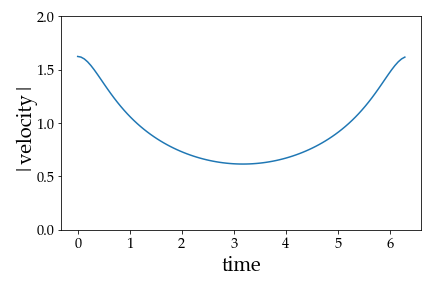

In [4]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass2=0, eccentricity=0)

vxp = np.asarray(orb.plan_vel)[:,0]
vyp = np.asarray(orb.plan_vel)[:,1]

plt.xlabel(r'time', fontsize=20)
plt.ylabel(r'|velocity|', fontsize=20)

plt.ylim([0,2])
line, = plt.plot(orb.time, np.sqrt(vxp*vxp + vyp*vyp))

plt.tight_layout()

# When slider is moved, update plot
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass2=0, eccentricity=change['new'])
        vxp = np.asarray(orb.plan_vel)[:,0]
        vyp = np.asarray(orb.plan_vel)[:,1]
        
        line.set_data(orb.time, np.sqrt(vxp*vxp + vyp*vyp))
                
w.observe(on_value_change, names='value')

<h2>A massive companion</h2>

Now we move beyond test particle orbits, and look at the full 2-body problem.